# <span style="color:blue">9/27</span>



### [2-1-1](#2-1-1) : 코로나 인구대비 확진자수가 많은 상위 5개국 누적확진자수, 일일확진자수, 누적사망자수, 일일사망자수 선그래프로 시각화

### [2-1-2](#2-1-2) " 코로나 검사자수, 확진자수, 완치자수, 사망자수, 인구수를 바탕으로 위험지수를 만들고 그 지수를 바탕으로 국가별 위험도를 판단, 상위 10개국에 대해 위험지수 막대그래프로 시각화

### [2-1-3](#2-1-3) : 한국 누적 확진자수를 바탕으로 시계열 예측. 선형 시계열과 비선형 시계열 2가지로 모델링하고 평가. 5월 16일 이후 데이터로 테스트.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose 

In [298]:
corona = pd.read_csv('../data/covid_19_data.csv',index_col = 'ObservationDate',parse_dates=True)
corona.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 109382 entries, 2020-01-22 to 2020-09-13
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SNo             109382 non-null  int64  
 1   Province/State  75709 non-null   object 
 2   Country/Region  109382 non-null  object 
 3   Last Update     109382 non-null  object 
 4   Confirmed       109382 non-null  float64
 5   Deaths          109382 non-null  float64
 6   Recovered       109382 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 6.7+ MB


In [10]:
corona.head()

,SNo,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,,
2020-01-22,1,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,2,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2020-01-22,3,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
2020-01-22,4,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,5,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


# <span style="color:blue">2-1-1</span>

In [11]:
corona.index.unique()

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-09-04', '2020-09-05', '2020-09-06', '2020-09-07',
               '2020-09-08', '2020-09-09', '2020-09-10', '2020-09-11',
               '2020-09-12', '2020-09-13'],
              dtype='datetime64[ns]', name='ObservationDate', length=236, freq=None)

In [12]:
last_day = corona.loc[corona.index == '2020-09-13']
last_day_country = last_day.groupby('Country/Region')[['Confirmed','Deaths','Recovered']].sum()
last_day_country

,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,38716.0,1420.0,31638.0
Albania,11353.0,334.0,6569.0
Algeria,48254.0,1612.0,34037.0
Andorra,1344.0,53.0,943.0
Angola,3388.0,134.0,1301.0
...,...,...,...
West Bank and Gaza,30574.0,221.0,20082.0
Western Sahara,10.0,1.0,8.0
Yemen,2011.0,583.0,1212.0


In [308]:
Confirmed_list = last_day_country.sort_values(by='Confirmed',ascending=False)[:5].index
Deaths_list = last_day_country.sort_values(by='Deaths',ascending=False)[:5].index
last_day_country.sort_values(by='Confirmed',ascending=False)

,Confirmed,Deaths,Recovered
Country/Region,,,
US,6519573.0,194071.0,2451406.0
India,4754356.0,78586.0,3702595.0
Brazil,4330455.0,131625.0,3723206.0
Russia,1059024.0,18517.0,873684.0
Peru,722832.0,30526.0,559321.0
...,...,...,...
Laos,23.0,0.0,21.0
Saint Kitts and Nevis,17.0,0.0,17.0
Holy See,12.0,0.0,12.0


In [14]:
Confirmed_list

Index(['US', 'India', 'Brazil', 'Russia', 'Peru'], dtype='object', name='Country/Region')

In [15]:
Top_Confrimed = corona.loc[corona['Country/Region'].isin(Confirmed_list)]
Top_Deaths = corona.loc[corona['Country/Region'].isin(Deaths_list)]

In [16]:
five_top_Confirmed = Top_Confrimed.groupby(['Country/Region','ObservationDate'])['Confirmed'].sum()
five_top_Deaths = Top_Deaths.groupby(['Country/Region','ObservationDate'])['Deaths'].sum()

<AxesSubplot:xlabel='ObservationDate'>

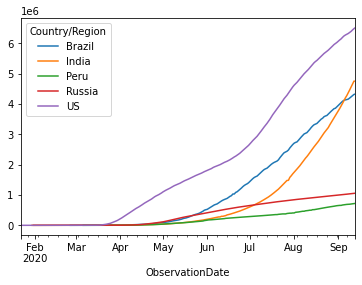

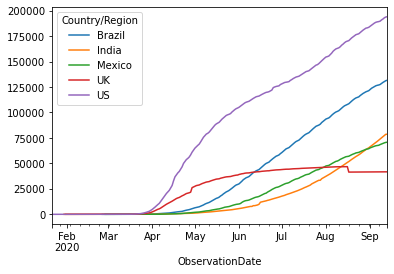

In [17]:
five_top_Confirmed.unstack('Country/Region').plot()
five_top_Deaths.unstack('Country/Region').plot()

In [59]:
f_u = five_top_Confirmed.unstack('Country/Region')
f_d = five_top_Deaths.unstack('Country/Region')
one_day_Confirmed = f_u - f_u.shift(1)
one_day_Deaths = f_d - f_d.shift(1)

In [60]:
one_day_Confirmed 

Country/Region,Brazil,India,Peru,Russia,US
ObservationDate,,,,,
2020-01-22,NaN,NaN,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN,NaN,0.0
2020-01-24,NaN,NaN,NaN,NaN,1.0
2020-01-25,NaN,NaN,NaN,NaN,0.0
2020-01-26,NaN,NaN,NaN,NaN,3.0
...,...,...,...,...,...
2020-09-09,35816.0,95735.0,4615.0,5172.0,34256.0
2020-09-10,40557.0,96551.0,6586.0,5310.0,35286.0
2020-09-11,43718.0,97570.0,7291.0,5421.0,47192.0


(-100.0, 5000.0)

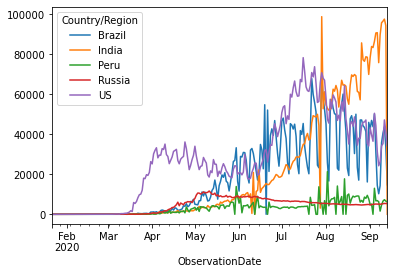

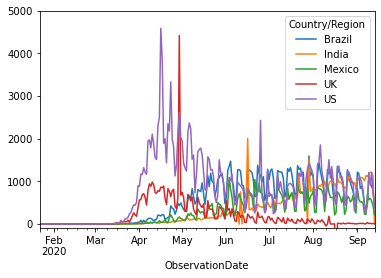

In [319]:
one_day_Confirmed.fillna(0).plot()
one_day_Deaths.fillna(0).plot()
plt.ylim(-100,5000)

# <span style="color:blue">2-1-2</span>

- risk = (확진자 수 - 사망자 수 - 완치자 수)/(state * 10000)
- 국가별 1달 risk 계산 평균 -> top 10

In [309]:
one_month = corona['2020-08-14':]
a = one_month.groupby(['ObservationDate','Country/Region'])[['Confirmed','Deaths','Recovered']].sum()
a

Confirmed  Deaths  Recovered
ObservationDate Country/Region                                  
2020-08-14      Afghanistan           37431.0  1363.0    26714.0
                Albania                7117.0   219.0     3695.0
                Algeria               37664.0  1351.0    26308.0
                Andorra                 989.0    53.0      863.0
                Angola                 1852.0    86.0      584.0
...                                       ...     ...        ...
2020-09-13      West Bank and Gaza    30574.0   221.0    20082.0
                Western Sahara           10.0     1.0        8.0
                Yemen                  2011.0   583.0     1212.0
                Zambia                13539.0   312.0    12260.0
                Zimbabwe               7526.0   224.0     5678.0

[5890 rows x 3 columns]

In [310]:
a.reset_index(level=0)

,ObservationDate,Confirmed,Deaths,Recovered
Country/Region,,,,
Afghanistan,2020-08-14,37431.0,1363.0,26714.0
Albania,2020-08-14,7117.0,219.0,3695.0
Algeria,2020-08-14,37664.0,1351.0,26308.0
Andorra,2020-08-14,989.0,53.0,863.0
Angola,2020-08-14,1852.0,86.0,584.0
...,...,...,...,...
West Bank and Gaza,2020-09-13,30574.0,221.0,20082.0
Western Sahara,2020-09-13,10.0,1.0,8.0
Yemen,2020-09-13,2011.0,583.0,1212.0


In [311]:
b = last_day.groupby('Country/Region')['SNo'].count()
b.name = 'State_Num'
b.sort_values(ascending=False)[:10]

Country/Region
Russia            83
US                58
Japan             49
India             37
Colombia          33
Mexico            32
Mainland China    31
Ukraine           27
Brazil            27
Peru              26
Name: State_Num, dtype: int64

In [312]:
df = a.reset_index(level=0).join(b, how='left')

In [313]:
df.set_index('ObservationDate',append=True,inplace=True)

In [314]:
df

Confirmed  Deaths  Recovered  State_Num
Country/Region ObservationDate                                         
Afghanistan    2020-08-14         37431.0  1363.0    26714.0          1
               2020-08-15         37551.0  1370.0    27166.0          1
               2020-08-16         37596.0  1375.0    27166.0          1
               2020-08-17         37599.0  1375.0    27166.0          1
               2020-08-18         37599.0  1375.0    27166.0          1
...                                   ...     ...        ...        ...
Zimbabwe       2020-09-09          7429.0   222.0     5542.0          1
               2020-09-10          7453.0   222.0     5635.0          1
               2020-09-11          7479.0   224.0     5660.0          1
               2020-09-12          7508.0   224.0     5675.0          1
               2020-09-13          7526.0   224.0     5678.0          1

[5890 rows x 4 columns]

In [315]:
df['risk_pi'] = (df['Confirmed'] - df['Deaths'] - df['Recovered'])/(df['State_Num']*10000)
df.head()

Confirmed  Deaths  Recovered  State_Num  \
Country/Region ObservationDate                                            
Afghanistan    2020-08-14         37431.0  1363.0    26714.0          1   
               2020-08-15         37551.0  1370.0    27166.0          1   
               2020-08-16         37596.0  1375.0    27166.0          1   
               2020-08-17         37599.0  1375.0    27166.0          1   
               2020-08-18         37599.0  1375.0    27166.0          1   

                                risk_pi  
Country/Region ObservationDate           
Afghanistan    2020-08-14        0.9354  
               2020-08-15        0.9015  
               2020-08-16        0.9055  
               2020-08-17        0.9058  
               2020-08-18        0.9058

In [316]:
# last_day_country['risk_pi'] = (last_day_country['Confirmed']/1000000 - last_day_country['Recovered']/1000000)/1000000
# top_risk_list = last_day_country.sort_values(by='risk_pi',ascending=False)[:10]
df_risk = df.groupby('Country/Region')['risk_pi'].mean()
top_risk_list = df_risk.sort_values(ascending=False)[:10]
top_risk_list

Country/Region
Bangladesh      10.533694
Argentina       10.164006
South Africa     7.527106
US               6.239020
Philippines      6.162177
Belgium          5.627332
Iraq             5.155116
Bolivia          5.124435
Honduras         4.621997
Romania          4.466106
Name: risk_pi, dtype: float64

<AxesSubplot:xlabel='Country/Region'>

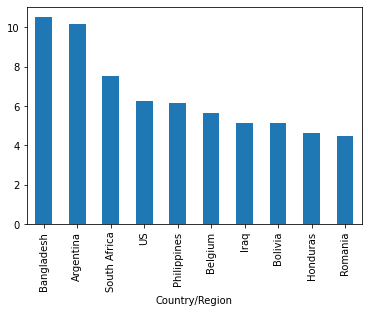

In [317]:
top_risk_list.plot.bar()

# <span style="color:blue">2-1-3</span>

In [130]:
k_c = corona[corona['Country/Region']=='South Korea']
print(len(k_c))
print(len(k_c.index.unique()))

236
236


In [197]:
from statsmodels.tsa.stattools import adfuller  # 정상성 판별 여부

<AxesSubplot:xlabel='ObservationDate'>

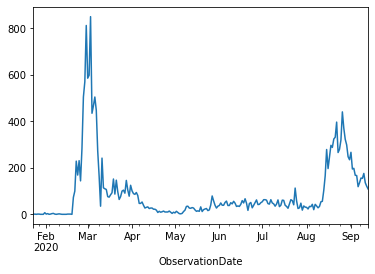

In [242]:
k = k_c['Confirmed']
korea_co = (k - k.shift(1)).dropna()
korea_co.plot()

In [243]:
train = korea_co[:'2020-05-15']
test = korea_co['2020-05-16':'2020-06-15']

In [244]:
adfuller(train)

(-2.692880412737049,
 0.07527839224613403,
 5,
 108,
 {'1%': -3.4924012594942333,
  '5%': -2.8886968193364835,
  '10%': -2.5812552709190673},
 1147.051801657943)

1차 차분

In [245]:
diff1 = (train - train.shift(1)).dropna()
adfuller(diff1)

(-5.228238034317768,
 7.697004182819284e-06,
 2,
 110,
 {'1%': -3.4912451337340342,
  '5%': -2.8881954545454547,
  '10%': -2.5809876033057852},
 1139.877102390829)

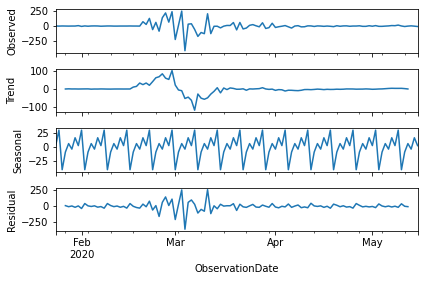

In [246]:
decomposition = seasonal_decompose(diff1)
decomposition.plot()
plt.show()

In [247]:
diff2 = (diff1 - diff1.shift(1)).dropna()
adfuller(diff2)

(-6.291128356594684,
 3.5970963612700875e-08,
 6,
 105,
 {'1%': -3.4942202045135513,
  '5%': -2.889485291005291,
  '10%': -2.5816762131519275},
 1140.9946617995597)

2차 차분

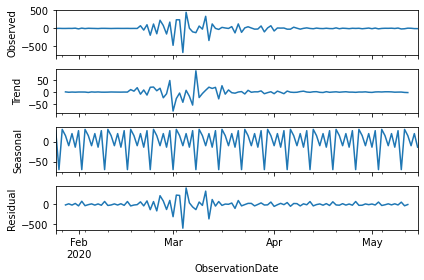

In [248]:
decomposition = seasonal_decompose(diff2)
decomposition.plot()
plt.show()

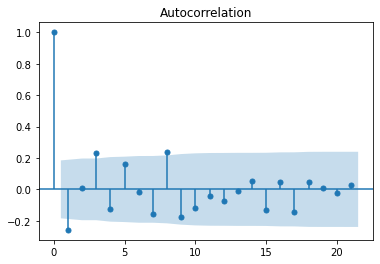

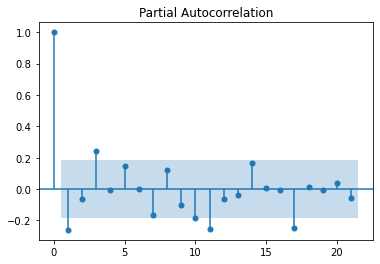

In [262]:
plot_acf(diff1);
plot_pacf(diff1);

In [277]:
model = sm.tsa.statespace.SARIMAX(train,
        order=[1,1,1],trend='t')

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [278]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:              Confirmed   No. Observations:                  114
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -641.888
Date:                Sun, 27 Sep 2020   AIC                           1291.777
Time:                        10:40:43   BIC                           1302.687
Sample:                    01-23-2020   HQIC                          1296.204
                         - 05-15-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0210      0.162     -0.129      0.897      -0.339       0.297
ar.L1         -0.1768      0.215     -0.821      0.412      -0.599       0.245
ma.L1         -0.0869      0.199     -0.437      0.662      -0.476       0.302
sigma2      5025.8920    309.739     16.226      0.000    4418.815    5632.969
===================================================================================
Ljung-Box (Q):                       34.23   Jarque-Bera (JB):               350.68
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [279]:
pred = result.predict(start='2020-05-16',end='2020-06-15')

<AxesSubplot:xlabel='ObservationDate'>

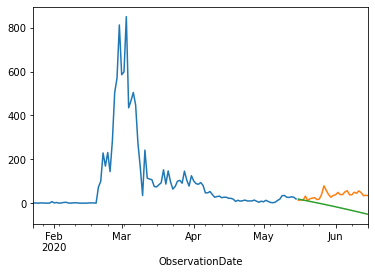

In [280]:
train.plot(label='Train')
test.plot(label='Test')
pred.plot(label='pred')

In [281]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test,pred)

3631.3045190567364

In [283]:
model = sm.tsa.statespace.SARIMAX(train,
        order=[1,1,1], trend = [0,1,1])
result = model.fit()
result.summary()

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:              Confirmed   No. Observations:                  114
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -641.925
Date:                Sun, 27 Sep 2020   AIC                           1293.851
Time:                        10:42:26   BIC                           1307.488
Sample:                    01-23-2020   HQIC                          1299.384
                         - 05-15-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0008      0.735     -0.001      0.999      -1.441       1.439
trend.2       -0.0002      0.016     -0.015      0.988      -0.031       0.031
ar.L1         -0.1758      0.224     -0.785      0.433      -0.615       0.263
ma.L1         -0.0878      0.207     -0.425      0.671      -0.493       0.317
sigma2      5216.6180    347.385     15.017      0.000    4535.756    5897.480
===================================================================================
Ljung-Box (Q):                       34.24   Jarque-Bera (JB):               350.89
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='ObservationDate'>

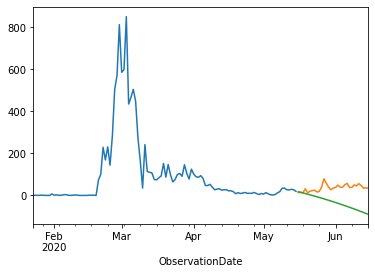

In [284]:
pred = result.predict(start='2020-05-16',end='2020-06-15')
train.plot(label='Train')
test.plot(label='Test')
pred.plot(label='pred')

In [285]:
mean_squared_error(test,pred)

6478.176590606611

In [287]:
from statsmodels.tsa.api import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train),
                trend='add')
model_result = model.fit()

In [288]:
model_result.summary()

Dep. Variable:,endog,No. Observations:,114
Model:,ExponentialSmoothing,SSE,571027.819
Optimized:,True,AIC,979.165
Trend:,Additive,BIC,990.110
Seasonal:,None,AICC,979.950
Seasonal Periods:,None,Date:,"Sun, 27 Sep 2020"
Box-Cox:,False,Time:,10:46:34
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7647937,alpha,True
smoothing_slope,0.000000,beta,True


In [289]:
y_hat = pd.DataFrame(test.copy())
y_hat['ES'] = model_result.forecast(len(test))
mean_squared_error(y_hat['Confirmed'],y_hat['ES'])

360.9693621017652

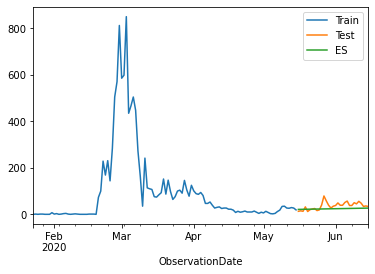

In [290]:
train.plot(label='Train')
test.plot(label='Test')
y_hat['ES'].plot(label='ES')
plt.legend()

In [293]:
model = ExponentialSmoothing(np.asarray(train+1),trend='mul')
model_result = model.fit()
model_result.summary()

Dep. Variable:,endog,No. Observations:,114
Model:,ExponentialSmoothing,SSE,559193.862
Optimized:,True,AIC,976.778
Trend:,Multiplicative,BIC,987.723
Seasonal:,None,AICC,977.563
Seasonal Periods:,None,Date:,"Sun, 27 Sep 2020"
Box-Cox:,False,Time:,10:47:32
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7749651,alpha,True
smoothing_slope,0.000000,beta,True


In [295]:
y_hat = pd.DataFrame(test.copy())
y_hat['ES'] = model_result.forecast(len(test))
mean_squared_error(y_hat['Confirmed'],y_hat['ES'])

995.7063961726025

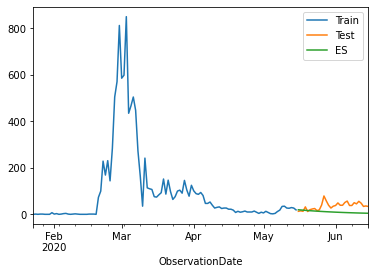

In [296]:
train.plot(label='Train')
test.plot(label='Test')
y_hat['ES'].plot(label='ES')
plt.legend()

비선형되는 방법....?

- https://otexts.com/fppkr/arima-ets.html
- https://teamdable.github.io/techblog/Time-Series-Analysis-hw